<a href="https://colab.research.google.com/github/SuryaPrasad2527/Machine-Learning-Experiments/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPT NO:3 Regression and Optimization
(Multi Linear and Polynomial regression)

Surya Prasad M

24BAD119



#Scenario 1-Multilinear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['final_score'] = df[['math score','reading score','writing score']].mean(axis=1)

In [6]:
np.random.seed(0)
df['study_hours'] = np.random.randint(1, 6, size=len(df))
df['attendance'] = np.random.randint(60, 100, size=len(df))
df['sleep_hours'] = np.random.randint(5, 9, size=len(df))

In [8]:
X = df[['study_hours', 'attendance',
        'parental level of education',
        'test preparation course',
        'sleep_hours']]

y = df['final_score']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [9]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 210.71660947650898
RMSE: 14.516081064685089
R² Score: 0.01702670918750726


In [10]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


                       Feature  Coefficient
0                  study_hours    -0.709038
1                   attendance     0.162098
2  parental level of education    -1.041502
3      test preparation course    -3.810855
4                  sleep_hours     0.656481


In [12]:
X_reduced = X[['study_hours', 'attendance', 'test preparation course']]
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

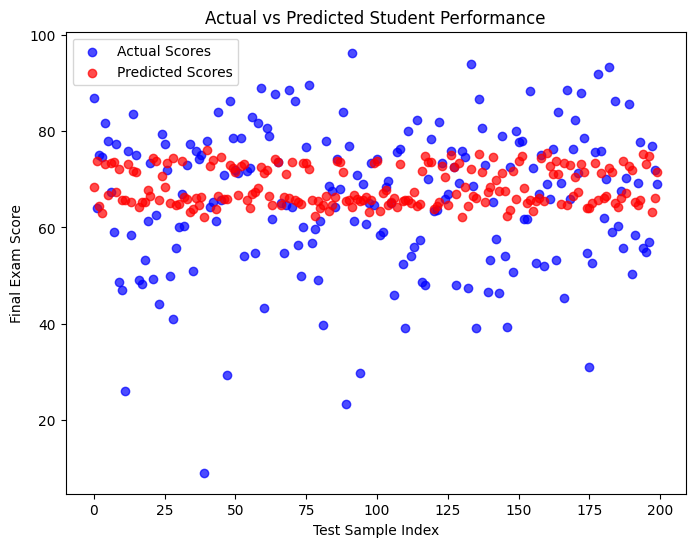

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test,color='blue', label='Actual Scores', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred,color='red', label='Predicted Scores', alpha=0.7)
plt.xlabel("Test Sample Index")
plt.ylabel("Final Exam Score")
plt.title("Actual vs Predicted Student Performance")
plt.legend()
plt.show()

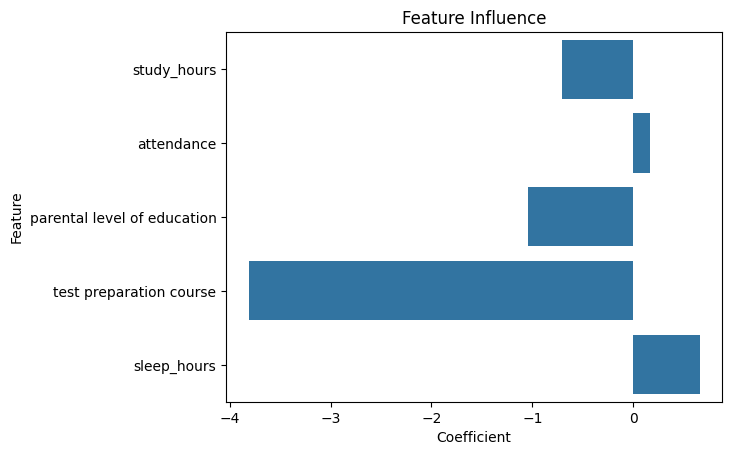

In [15]:
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Influence")
plt.show()

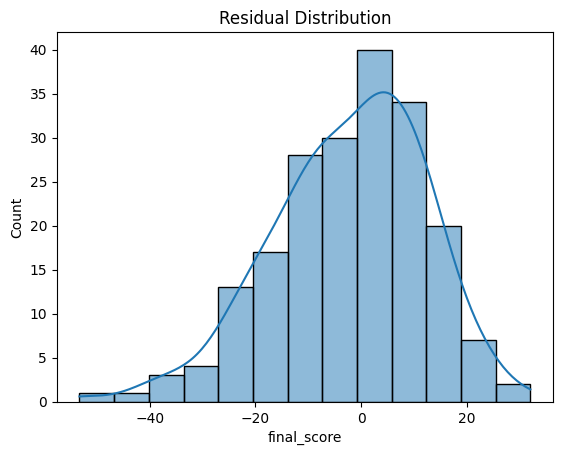

In [16]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

#Scenario 2 - Polynomial regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv("/content/drive/MyDrive/auto-mpg.csv")
df.replace('?', np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
df.dropna(inplace=True)

In [19]:
X = df[['horsepower']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [20]:
degrees = [2, 3, 4]
results = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    scaler = StandardScaler()
    X_poly_train = scaler.fit_transform(X_poly_train)
    X_poly_test = scaler.transform(X_poly_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred = model.predict(X_poly_test)

    results[d] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

In [21]:
for d, res in results.items():
    print(f"Degree {d}: {res}")

Degree 2: {'MSE': 18.41696779601779, 'RMSE': np.float64(4.291499481069267), 'R2': 0.6391701147013311}
Degree 3: {'MSE': 18.460267222224626, 'RMSE': np.float64(4.296541309265469), 'R2': 0.6383217814053861}
Degree 4: {'MSE': 18.268226874853184, 'RMSE': np.float64(4.274134634619409), 'R2': 0.6420842844016577}


In [22]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_poly_train, y_train)


Ridge()

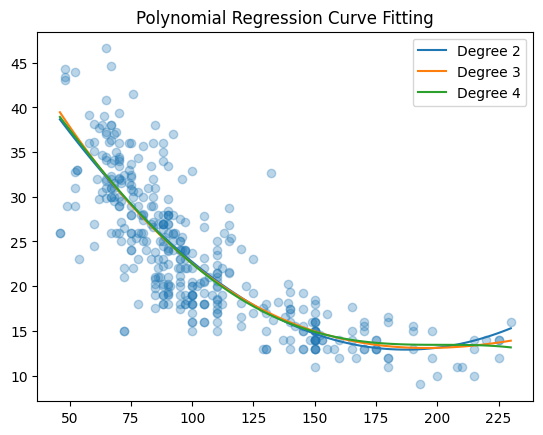

In [23]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

for d in degrees:
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X_range)
    y_curve = LinearRegression().fit(
        poly.fit_transform(X_train), y_train).predict(X_poly)
    plt.plot(X_range, y_curve, label=f"Degree {d}")

plt.scatter(X, y, alpha=0.3)
plt.legend()
plt.title("Polynomial Regression Curve Fitting")
plt.show()


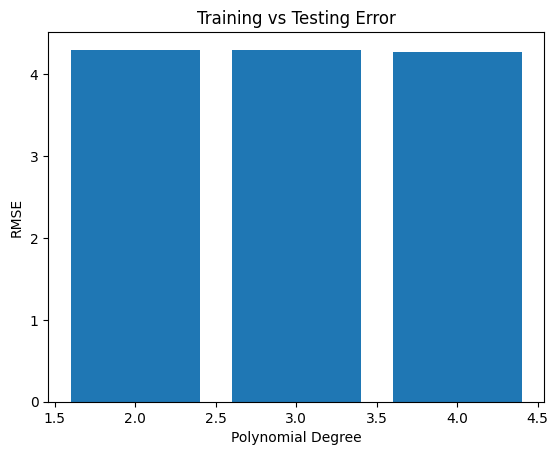

In [24]:
plt.bar(results.keys(), [v['RMSE'] for v in results.values()])
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Training vs Testing Error")
plt.show()
